# Poisson Distribution

## Problem Statement 
Given that a bank has a footfall of 6 people per minute, find out the

a) probability distribution for upto 20 people per minute<br> b) probability of at least 4 people per minute

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# Since the rate is 6 people per minute
rate = 6

In [4]:
# Since we are meausing the customer upto 20 people per minute, lets generate the poisson dist from 0 to 19
n = np.arange(0, 20)
poisson_dist = stats.poisson.pmf(n, rate)
poisson_dist

array([2.47875218e-03, 1.48725131e-02, 4.46175392e-02, 8.92350784e-02,
       1.33852618e-01, 1.60623141e-01, 1.60623141e-01, 1.37676978e-01,
       1.03257734e-01, 6.88384890e-02, 4.13030934e-02, 2.25289600e-02,
       1.12644800e-02, 5.19899078e-03, 2.22813891e-03, 8.91255562e-04,
       3.34220836e-04, 1.17960295e-04, 3.93200983e-05, 1.24168732e-05])

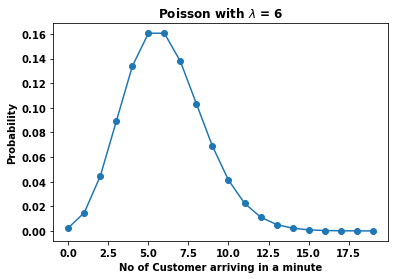

In [5]:
# Lets plot the distribution
plt.plot(n, poisson_dist, 'o-')
plt.title('Poisson with $\lambda$ = {}'.format(rate))
plt.xlabel('No of Customer arriving in a minute')
plt.ylabel('Probability')
plt.show()

In [11]:
# a) probability distribution for upto 20 people per minute
p_upto=0
for i in range(20):
    p_upto = p_upto + poisson_dist[i]

print(p_upto)

0.9999948198310626


In [6]:
# b) probability of at least 4 people per minute

p_4atleast = 1- (poisson_dist[0] + poisson_dist[1]+poisson_dist[2]+poisson_dist[3])
p_4atleast

0.8487961172233521